### car price predictor


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read the file and checks the missing values and cleaning the dataset

In [53]:
df=pd.read_csv("Toyota.csv")
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90,0.0,0,2000,3,1170,Low
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,60,20544,Petrol,86,1.0,0,1300,3,1025,Low
1432,10845,72,63634,Petrol,86,0.0,0,1300,3,1015,Low
1433,8500,60,17016,Petrol,86,0.0,0,1300,3,1015,Low
1434,7250,70,63634,Petrol,86,1.0,0,1300,3,1015,Low


In [6]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90,0.0,0,2000,3,1170,Low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   int64  
 2   KM         1436 non-null   int64  
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
 10  KM_vs_Age  1436 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 123.5+ KB


In [10]:
df.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90,0.0,0,2000,3,1170,Low
5,12950,32,61000,Diesel,90,0.0,0,2000,3,1170,High
6,16900,27,63634,Diesel,????,1.0,0,2000,3,1245,High
7,18600,30,75889,Petrol,90,1.0,0,2000,3,1245,High
8,21500,27,19700,Petrol,192,0.0,0,1800,3,1185,Low
9,12950,23,71138,Diesel,????,1.0,0,1900,3,1105,High


In [11]:
df.describe()

,Price,Age,KM,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.973538,68949.374652,0.708914,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,17.964211,36786.227888,0.454421,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,15.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,44027.250000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,68.000000,86916.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [18]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
KM_vs_Age    0
dtype: int64

In [19]:
df.isnull().any(axis=1).sum()

0

<Axes: >

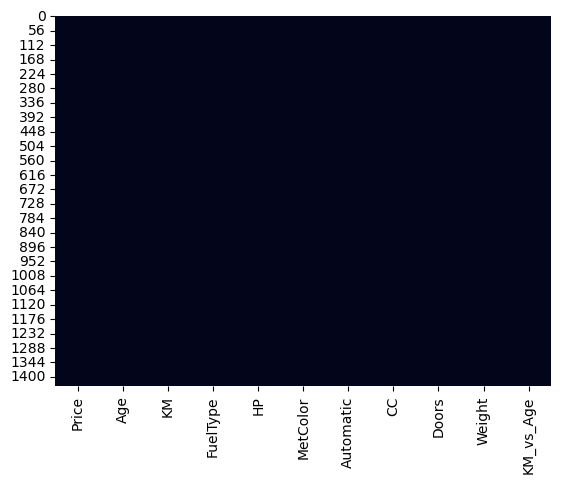

In [23]:
sns.heatmap(df.isnull(),cbar=False)

In [25]:
for col in df.columns:
    print(col,df[col].unique()[:10])

Price [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950]
Age [23 24 26 30 32 27 25 22 31 28]
KM [46986 72937 41711 48000 38500 61000 63634 75889 19700 71138]
FuelType ['Diesel' 'Petrol' 'CNG']
HP ['90' '????' '192' '110' '97' '71' '116' '98' '69' '86']
MetColor [1. 0.]
Automatic [0 1]
CC [2000 1800 1900 1600 1400 1598 1995 1398 1300 1587]
Doors [3 5 4 2]
Weight [1165 1170 1245 1185 1105 1065 1120 1100 1255 1270]
KM_vs_Age ['Low' 'High']


In [26]:
for col in df.columns:
    print("\nColumn:", col)
    print(df[col].value_counts(dropna=False).head(10))



Column: Price
Price
8950     109
9950      84
7950      63
10950     62
11950     47
8750      41
8250      39
7750      37
10500     35
12950     31
Name: count, dtype: int64

Column: Age
Age
60    126
65     62
68     60
80     52
62     41
78     41
77     36
67     35
61     34
54     33
Name: count, dtype: int64

Column: KM
KM
63634    24
59000     7
36000     7
43000     7
75000     6
45000     6
61000     6
10000     6
60000     5
64000     5
Name: count, dtype: int64

Column: FuelType
FuelType
Petrol    1277
Diesel     144
CNG         15
Name: count, dtype: int64

Column: HP
HP
110     833
86      249
97      164
72       72
90       35
69       33
107      21
192      10
116       9
????      6
Name: count, dtype: int64

Column: MetColor
MetColor
1.0    1018
0.0     418
Name: count, dtype: int64

Column: Automatic
Automatic
0    1356
1      80
Name: count, dtype: int64

Column: CC
CC
1600    846
1300    248
1400    164
2000    119
1900     30
1800     14
1598      4
1587     

In [27]:
df.dtypes


Price          int64
Age            int64
KM             int64
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
KM_vs_Age     object
dtype: object

In [54]:
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)


Index(['FuelType', 'HP', 'KM_vs_Age'], dtype='object')


In [55]:
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')


In [56]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           6
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
KM_vs_Age    0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   int64  
 2   KM         1436 non-null   int64  
 3   FuelType   1436 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
 10  KM_vs_Age  1436 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 123.5+ KB


In [58]:
df.dtypes

Price          int64
Age            int64
KM             int64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
KM_vs_Age     object
dtype: object

In [59]:
df.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90.0,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90.0,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90.0,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90.0,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90.0,0.0,0,2000,3,1170,Low
5,12950,32,61000,Diesel,90.0,0.0,0,2000,3,1170,High
6,16900,27,63634,Diesel,NaN,1.0,0,2000,3,1245,High
7,18600,30,75889,Petrol,90.0,1.0,0,2000,3,1245,High
8,21500,27,19700,Petrol,192.0,0.0,0,1800,3,1185,Low
9,12950,23,71138,Diesel,NaN,1.0,0,1900,3,1105,High


In [60]:
df["HP"]=df["HP"].fillna(df["HP"].median())

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   int64  
 2   KM         1436 non-null   int64  
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
 10  KM_vs_Age  1436 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 123.5+ KB


In [62]:
df.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90.0,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90.0,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90.0,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90.0,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90.0,0.0,0,2000,3,1170,Low
5,12950,32,61000,Diesel,90.0,0.0,0,2000,3,1170,High
6,16900,27,63634,Diesel,110.0,1.0,0,2000,3,1245,High
7,18600,30,75889,Petrol,90.0,1.0,0,2000,3,1245,High
8,21500,27,19700,Petrol,192.0,0.0,0,1800,3,1185,Low
9,12950,23,71138,Diesel,110.0,1.0,0,1900,3,1105,High


In [63]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.973538,68949.374652,101.513928,0.708914,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,17.964211,36786.227888,14.747603,0.454421,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,15.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,44027.250000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,68.000000,86916.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [64]:
df.dtypes

Price          int64
Age            int64
KM             int64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
KM_vs_Age     object
dtype: object

In [65]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    print(col, df[col].min(), df[col].max())


Price 4350 32500
Age 1 80
KM 15 243000
HP 69.0 192.0
MetColor 0.0 1.0
Automatic 0 1
CC 1300 2000
Doors 2 5
Weight 1000 1615


In [66]:
for col in obj_cols:
    print(col, df[col].value_counts())


FuelType FuelType
Petrol    1277
Diesel     144
CNG         15
Name: count, dtype: int64
HP HP
110.0    839
86.0     249
97.0     164
72.0      72
90.0      35
69.0      33
107.0     21
192.0     10
116.0      9
98.0       2
71.0       1
73.0       1
Name: count, dtype: int64
KM_vs_Age KM_vs_Age
Low     851
High    585
Name: count, dtype: int64


In [67]:
df.to_csv("cleaned_data.csv", index=False)


In [68]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_vs_Age
0,13500,23,46986,Diesel,90.0,1.0,0,2000,3,1165,Low
1,13750,23,72937,Diesel,90.0,1.0,0,2000,3,1165,High
2,13950,24,41711,Diesel,90.0,1.0,0,2000,3,1165,High
3,14950,26,48000,Diesel,90.0,0.0,0,2000,3,1165,High
4,13750,30,38500,Diesel,90.0,0.0,0,2000,3,1170,Low
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,60,20544,Petrol,86.0,1.0,0,1300,3,1025,Low
1432,10845,72,63634,Petrol,86.0,0.0,0,1300,3,1015,Low
1433,8500,60,17016,Petrol,86.0,0.0,0,1300,3,1015,Low
1434,7250,70,63634,Petrol,86.0,1.0,0,1300,3,1015,Low
